<a href="https://www.kaggle.com/code/syedasifmn/pca-and-lda?scriptVersionId=116507047" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

##  Data Loading and Exploration.

### 1. Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-data/sales_data_sample.csv


### Loading Dataset

In [2]:
try:
        df_org = pd.read_csv('/kaggle/input/sales-data/sales_data_sample.csv',encoding='latin-1')
        df = df_org
        print("Dataset loaded successfully")
except Exception as e:
        print(f"Failed to load data. Error: {e}")

Dataset loaded successfully


### 2. Displaying a sample of five rows of the data frame

In [3]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### 3. Shape of the data (number of rows and columns).

In [4]:
df.shape

(2823, 25)

### 3. General information about the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**Histogram of the data**

<function matplotlib.pyplot.show(close=None, block=None)>

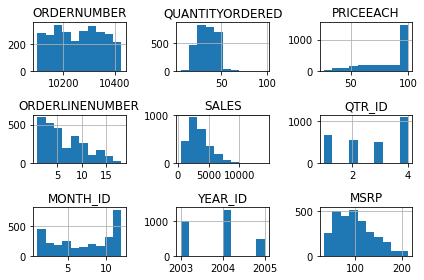

In [6]:
df.hist()
plt.tight_layout()
plt.show

**Interpretation:** The above plot shows that the variables `PRICEEACH`, `QTR_ID` , `MONTH_ID` are left skewed. 

The variables `ORDERLINENUMBER`, `SALES`, and `MSRP` are right skewed. 

And the variables `ORDERNUMBER`, `QUANTITYORDERED`, `YEAR_ID` are near normally distributed.

**Pairplot and Correlation Matrix of the Independent dimensions**

<function matplotlib.pyplot.show(close=None, block=None)>

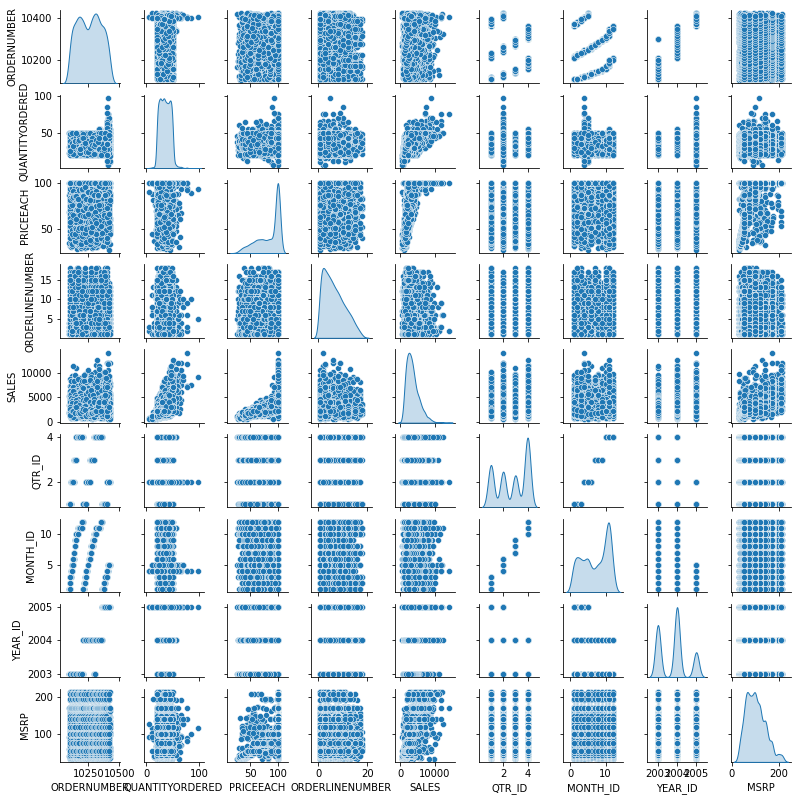

In [7]:
sns.pairplot(df, diag_kind='kde', height = 1.25) 
plt.show

**Correlation Matrix**

In [8]:
describe = df.corr()
describe.style.background_gradient(cmap = "Blues")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000


**Interpretation** Most of the numeric dimensions have negligible correlation (0 to 0.30 or -0.30 to 0)

### 4. Percentage of missing values in each column of the data frame.

In [9]:
print('Missing values in each column of the data frame (in %):')
df.isnull().sum()/len(df) * 100

Missing values in each column of the data frame (in %):


ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

### 5. Checking for duplicate rows.

In [10]:
print(f'Duplicate row count: {len(df[df.duplicated()])}')

Duplicate row count: 0


### 6. Imputing missing values of the columns "STATE", "POSTALCODE","TERRITORY" with its most occurring label.

In [11]:
print(f'Most occurring label of "STATE" column is \'{df["STATE"].mode().values[0]}\'')

Most occurring label of "STATE" column is 'CA'


In [12]:
print(f'Most occurring label of "POSTALCODE" column is \'{df["POSTALCODE"].mode().values[0]}\'')

Most occurring label of "POSTALCODE" column is '28034'


In [13]:
print(f'Most occurring label of "TERRITORY" column is \'{df["TERRITORY"].mode().values[0]}\'')

Most occurring label of "TERRITORY" column is 'EMEA'


In [14]:
df['STATE'].fillna(df['STATE'].mode().values[0], inplace=True)
df['POSTALCODE'].fillna(df['POSTALCODE'].mode().values[0], inplace=True)
df['TERRITORY'].fillna(df['TERRITORY'].mode().values[0], inplace=True)

In [15]:
print('Missing values in each column of the data frame (in %) after data imputation is:')
df.isnull().sum()/len(df) * 100

Missing values in each column of the data frame (in %) after data imputation is:


ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE                0.000000
POSTALCODE           0.000000
COUNTRY              0.000000
TERRITORY            0.000000
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

### 7. Dropping "ADDRESSLINE2","ORDERDATE","PHONE" column.

In [16]:
df = df.drop(['ADDRESSLINE2','ORDERDATE', 'PHONE'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  ADDRESSLINE1      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  STATE             2823 non-null   object 
 16  POSTALCODE        2823 non-null   object 


### 8. Encoding "STATUS" column

In [17]:
df['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [18]:
df['STATUS'].replace(['Cancelled', 'Resolved', 'On Hold', 'In Process', 'Disputed', 'Shipped'], [0, 0, 0, 0, 0, 1], inplace=True)

In [19]:
df['STATUS'].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

### 9. Assigning "STATUS" column into a label variable

In [20]:
status = df['STATUS']
status

0       1
1       1
2       1
3       1
4       1
       ..
2818    1
2819    1
2820    0
2821    1
2822    0
Name: STATUS, Length: 2823, dtype: int64

### 9. Dropping "STATUS" column from the original Dataframe

In [21]:
df = df.drop(['STATUS'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   QTR_ID            2823 non-null   int64  
 6   MONTH_ID          2823 non-null   int64  
 7   YEAR_ID           2823 non-null   int64  
 8   PRODUCTLINE       2823 non-null   object 
 9   MSRP              2823 non-null   int64  
 10  PRODUCTCODE       2823 non-null   object 
 11  CUSTOMERNAME      2823 non-null   object 
 12  ADDRESSLINE1      2823 non-null   object 
 13  CITY              2823 non-null   object 
 14  STATE             2823 non-null   object 
 15  POSTALCODE        2823 non-null   object 
 16  COUNTRY           2823 non-null   object 


### 9. Converting the original dataframe to the dummy coded data.

In [22]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 645 entries, ORDERNUMBER to DEALSIZE_Small
dtypes: float64(2), int64(7), uint8(636)
memory usage: 1.9 MB


### 10. Using StandardScaler to scale the data

In [23]:
scaled_data = StandardScaler().fit_transform(df)
scaled_data

array([[-1.64794709, -0.52289086,  0.5969775 , ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.35468931,  0.60650538,  0.54938372, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       [ 1.50185877, -0.11220131, -1.06186404, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [ 1.68650256,  1.2225397 , -0.89925195, ..., -0.24267205,
         1.01967636, -0.9121005 ]])

##  PCA FOR VISUALIZATION

### 1. Taking the help of PCA to reduce the data to 2 dimensions

In [24]:
# create a dataframe of scaled data
df_std = pd.DataFrame(scaled_data, columns = df.columns)

print('Mean: \n', round(df_std.mean()))
print('\nStandard Deviation: \n', round(df_std.std()))

Mean: 
 ORDERNUMBER               -0.0
QUANTITYORDERED            0.0
PRICEEACH                 -0.0
ORDERLINENUMBER            0.0
SALES                      0.0
                          ... 
CONTACTFIRSTNAME_Wing C    0.0
CONTACTFIRSTNAME_Yoshi     0.0
DEALSIZE_Large             0.0
DEALSIZE_Medium            0.0
DEALSIZE_Small             0.0
Length: 645, dtype: float64

Standard Deviation: 
 ORDERNUMBER                1.0
QUANTITYORDERED            1.0
PRICEEACH                  1.0
ORDERLINENUMBER            1.0
SALES                      1.0
                          ... 
CONTACTFIRSTNAME_Wing C    1.0
CONTACTFIRSTNAME_Yoshi     1.0
DEALSIZE_Large             1.0
DEALSIZE_Medium            1.0
DEALSIZE_Small             1.0
Length: 645, dtype: float64


In [25]:
# Using the 'PCA()' from the sklearn library to reduce the number of features 
pca = PCA(n_components = 2, random_state = 10)  
df_pca_data = pd.DataFrame(pca.fit_transform(df_std), columns = ['PC1', 'PC2'])

### 2. Plotting a scatter plot with the first and second principal components

<function matplotlib.pyplot.show(close=None, block=None)>

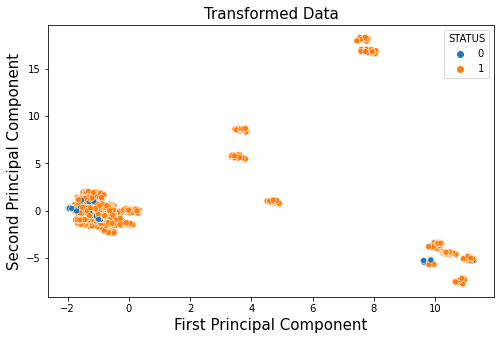

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_data, hue = status)
plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)
plt.show

 ### 3.Intuitions about the scatter plot.

The graph shows that the first principal component separates the dimensions into four clusters. 
PC1 reveals the most variation, while PC2 reveals the second most variation. Therefore, differences among clusters along PC1 axis are actually larger than the similar-looking distances along PC2 axis.

 ## PCA FOR DIMENSION REDUCTION.

### 1. Fitting the PCA model on the data

In [27]:
# Fit the PCA and transform the standardized data
pca_data = pca.fit_transform(df_std)
df_pca_data = pd.DataFrame(pca_data, columns = ['PC1', 'PC2'])
df_pca_data

,PC1,PC2
0,-0.884263,-0.560361
1,-1.064412,0.347537
2,-1.050108,0.141227
3,-1.280154,-0.488864
4,-1.366455,-0.317167
...,...,...
2818,-1.594559,-0.220117
2819,-1.640883,1.168321
2820,-1.705959,-0.023996
2821,-1.260754,0.298366


###  1. Plotting a graph between n_components and cumulative explained variance.

***Covariance Matrix, Eigen Vectors and Eigen Values for the data***

In [28]:
cov_matrix = np.cov(df_std.T)
print('Covariance Matrix \n', cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('\n Eigen Vectors \n', eigenvectors)
print('\n Eigen Values \n', eigenvalues)

Covariance Matrix 
 [[ 1.00035436  0.06556638 -0.00293558 ...  0.03253303 -0.00786511
  -0.00707781]
 [ 0.06556638  1.00035436  0.005566   ...  0.30233777  0.28751923
  -0.42784622]
 [-0.00293558  0.005566    1.00035436 ...  0.19425996  0.56921326
  -0.66093218]
 ...
 [ 0.03253303  0.30233777  0.19425996 ...  1.00035436 -0.23807362
  -0.22141973]
 [-0.00786511  0.28751923  0.56921326 ... -0.23807362  1.00035436
  -0.89481697]
 [-0.00707781 -0.42784622 -0.66093218 ... -0.22141973 -0.89481697
   1.00035436]]

 Eigen Vectors 
 [[-4.75623841e-03+0.00000000e+00j  5.91466785e-03+0.00000000e+00j
  -2.60851257e-03+0.00000000e+00j ...  2.11702647e-17-1.32290387e-17j
   2.11702647e-17+1.32290387e-17j  3.14735648e-17+0.00000000e+00j]
 [-1.35779533e-02+0.00000000e+00j -1.03535215e-02+0.00000000e+00j
   4.85769970e-04+0.00000000e+00j ... -3.10729253e-17+6.82471100e-18j
  -3.10729253e-17-6.82471100e-18j  3.93340574e-18+0.00000000e+00j]
 [-5.91527151e-03+0.00000000e+00j  3.03215733e-03+0.00000000e+00

In [29]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigenvalues in descending order: \n', eigvalues_sorted)

Eigenvalues in descending order: 
 [(10.101426343461727+0j), (8.902294580750718+0j), (8.492164939438409+0j), (8.106542791216928+0j), (7.7244677420026955+0j), (7.605491695778079+0j), (7.505377867434721+0j), (7.328984842411734+0j), (7.3090022748953745+0j), (7.277187262173296+0j), (7.224844953103977+0j), (7.186880420535873+0j), (7.172115958659682+0j), (7.152334106098248+0j), (7.116973967854228+0j), (7.110264959257172+0j), (7.099337654695944+0j), (7.0712785613977465+0j), (7.033206730458464+0j), (6.9974249076369945+0j), (6.942784822382789+0j), (6.82840888340867+0j), (6.805046569341303+0j), (6.679710659815379+0j), (6.670957676058757+0j), (6.550787043184728+0j), (6.529927556881942+0j), (6.447144036663888+0j), (6.382874348729196+0j), (6.353145588813199+0j), (6.277609348293966+0j), (6.250378198354632+0j), (6.208931881013422+0j), (6.192470411085565+0j), (6.175265768009649+0j), (6.168458633728755+0j), (6.133018941725219+0j), (6.1230923653325044+0j), (6.106772999679064+0j), (6.100504241195991+0j),

In [30]:
tot_sum = sum(eigenvalues)
var_explained = [(i / tot_sum) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)  
cum_var_exp

array([0.01565558+0.00000000e+00j, 0.0294527 +0.00000000e+00j,
       0.04261418+0.00000000e+00j, 0.05517801+0.00000000e+00j,
       0.06714969+0.00000000e+00j, 0.07893697+0.00000000e+00j,
       0.09056909+0.00000000e+00j, 0.10192784+0.00000000e+00j,
       0.11325561+0.00000000e+00j, 0.12453407+0.00000000e+00j,
       0.13573141+0.00000000e+00j, 0.14686992+0.00000000e+00j,
       0.15798554+0.00000000e+00j, 0.1690705 +0.00000000e+00j,
       0.18010066+0.00000000e+00j, 0.19112042+0.00000000e+00j,
       0.20212325+0.00000000e+00j, 0.21308259+0.00000000e+00j,
       0.22398292+0.00000000e+00j, 0.2348278 +0.00000000e+00j,
       0.24558799+0.00000000e+00j, 0.25617092+0.00000000e+00j,
       0.26671765+0.00000000e+00j, 0.27707012+0.00000000e+00j,
       0.28740902+0.00000000e+00j, 0.29756169+0.00000000e+00j,
       0.30768202+0.00000000e+00j, 0.31767405+0.00000000e+00j,
       0.32756647+0.00000000e+00j, 0.33741282+0.00000000e+00j,
       0.3471421 +0.00000000e+00j, 0.35682918+0.0000000

/opt/conda/lib/python3.7/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


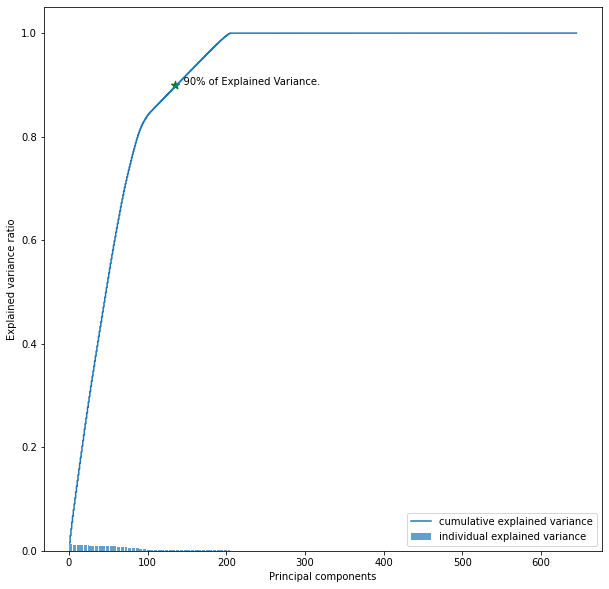

In [31]:
plt.figure(figsize=(10, 10))
plt.bar(range(1,round(tot_sum.real + 1)), var_explained, alpha=0.7, align='center', label='individual explained variance')
plt.step(range(1,round(tot_sum.real + 1)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.scatter(135, 0.9, s=75, c ="green", linewidths = 1, marker ="*")
plt.annotate("    90% of Explained Variance.", (130, 0.9))
plt.show()

### 2. In how many components we are getting approximately 90% of explained Variance?

From the above plot, In about 135 components, we are getting approximately 90% of explained Variance. 

##  LDA.

### 1. Splitting the dataset into two parts (i.e. 80% train and 20% test) using random_state = 42.

In [32]:
test_size = 0.20 
random_state = 42

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_std, status, test_size = test_size, random_state = random_state)

print('X_train_raw:', X_train_raw.shape)
print('y_train:', y_train.shape)
print('X_test_raw:', X_test_raw.shape)
print('y_test:', y_test.shape)

X_train_raw: (2258, 645)
y_train: (2258,)
X_test_raw: (565, 645)
y_test: (565,)


### 2. Training a Linear Discriminant Analysis(LDA) model on the train data.

In [33]:
# Instantiate LDA with required number of components to 
# transform the data on 1-D vector pass 'n_components = 1'
lda = LDA(n_components = 1)

# Fit and transform the LDA on train data using the 'fit_transform()' 
X_train_lda = lda.fit_transform(X_train_raw, y_train)

# Transform the test data 
X_test_lda = lda.transform(X_test_raw)

In [34]:
X_train_lda.shape, X_test_lda.shape

((2258, 1), (565, 1))

### 3. Training a RandomForest classifier model on the transformed train and test data and printing the accuracy score.

In [35]:
# function to perform random forest algorithm and return the accuracy on the test set
def randomforest_model_run(X_train, X_test, y_train, y_test):
    rf_clf = RandomForestClassifier(random_state=1)
    
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred) 
    
    return print('Test Accuracy:', test_acc)

In [36]:
randomforest_model_run(X_train_lda, X_test_lda, y_train, y_test)

Test Accuracy: 0.9026548672566371
